In [14]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
#read the csv-file
df = pd.read_csv('../data/raw/credit-risk-dataset/credit_risk_dataset.csv')
print(df.shape)
df.head()

(32581, 12)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [16]:
#general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


The columns with 'object'-datatypes to be changed to 'category' in the cleaning step.

In [17]:
#missing values
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

There are 2 columns with missing values:
'person_emp_length' - 895 values, ~2.75% of data
'loan_int_rate' - 3116 values, ~9.56% of data

In [13]:
#description
pd.set_option('display.float_format', '{:.0f}'.format)
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581,32581,31686,32581,29465,32581,32581,32581
mean,28,66075,5,9589,11,0,0,6
std,6,61983,4,6322,3,0,0,4
min,20,4000,0,500,5,0,0,2
25%,23,38500,2,5000,8,0,0,3
50%,26,55000,4,8000,11,0,0,4
75%,30,79200,7,12200,13,0,0,8
max,144,6000000,123,35000,23,1,1,30


In [40]:
df.nunique().sort_values()

loan_status                      2
cb_person_default_on_file        2
person_home_ownership            4
loan_intent                      6
age_group                        6
loan_grade                       7
cb_person_cred_hist_length      29
person_emp_length               36
person_age                      58
loan_percent_income             77
loan_int_rate                  348
loan_amnt                      753
person_income                 4295
dtype: int64

In [46]:
print('person_home_ownership:', df['person_home_ownership'].unique(),'\n')
print('Loan grade: ', df['loan_grade'].unique(),'\n')
print('Loan intent:', df['loan_intent'].unique(),'\n')
print('Default:', df['cb_person_default_on_file'].unique())

person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER'] 

Loan grade:  ['D' 'B' 'C' 'A' 'E' 'F' 'G'] 

Loan intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION'] 

Default: ['Y' 'N']


In [10]:
#checking the implausible data in column 'person_age'
mask_age = df['person_age'] > 100
print(df[mask_age].shape)
df.loc[mask_age,'person_age']

(5, 12)


81       144
183      144
575      123
747      123
32297    144
Name: person_age, dtype: int64

There are 5 cases with the age more than 100. These values seem unrealistic. In the later cleaning step they should be either removed or treated as outliers.

In [11]:
#checking the implausible data in column 'person_emp_length'
mask_emp = df['person_emp_length'] > 50
print(df[mask_emp].shape)
df.loc[mask_emp,'person_emp_length']

(2, 12)


0      123.0
210    123.0
Name: person_emp_length, dtype: float64

There are 2 cases with the employment length 123 years. These values seem unrealistic. In the later cleaning step they should be either removed or treated as outliers.

In [12]:
#checking the implausible data in column 'person_income'
mask_income = df['person_income'] > 1000000
print(df[mask_income].shape)
df.loc[mask_income,'person_income']

(9, 12)


17833    1200000
29119    1200000
29120    1200000
30049    2039784
31922    1362000
31924    1440000
32297    6000000
32497    1782000
32546    1900000
Name: person_income, dtype: int64

There are 9 cases with the income more than 1000000. These values seem unrealistic high for typical borrowers and will be investigated during the data cleaning step.

In [23]:
# distribution of the target variable
print(df['cb_person_default_on_file'].value_counts(),'\n')

print(df['cb_person_default_on_file'].value_counts(normalize=True))

cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64 

cb_person_default_on_file
N    0.82367
Y    0.17633
Name: proportion, dtype: float64


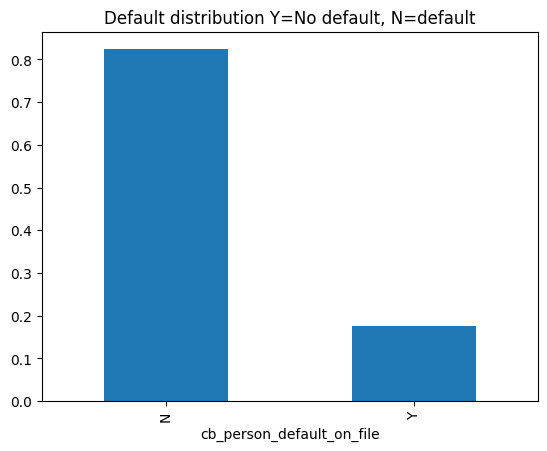

In [36]:
default_ct = pd.crosstab(index=df['cb_person_default_on_file'],columns='count',normalize=True)
default_ct.plot(kind='bar',legend=False,title='Default distribution Y=No default, N=default');
